# Importing the necessary libraries for data preprocessing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
import tensorflow as tf
from keras import layers

# Importing libraries for the path reading of images

In [2]:
%cd D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\archive\\images

D:\ML DL AI DSBDA\Railway Track Fault Detection\archive\images


In [3]:
from imutils import paths
from pathlib import Path

In [4]:
defectiveImages = Path(r"D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective")
nonDefectiveImages = Path(r"D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective")

defective_tracks = list(paths.list_images(defectiveImages))
non_defective_tracks = list(paths.list_images(nonDefectiveImages))


In [5]:
defective_tracks[0:6]

['D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000102.jpg']

In [6]:
non_defective_tracks[0:6]

['D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000102.jpg']

# Image Visualization Phase

In [7]:
defective_image_arr = []
non_defective_image_arr = []

for i in range(0, 8):
    defective_image_arr.append(defective_tracks[i])
    non_defective_image_arr.append(non_defective_tracks[i])

In [8]:
defective_image_arr

['D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000102.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000103.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Defective\\000104.jpg']

In [9]:
non_defective_image_arr

['D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000102.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000103.jpg',
 'D:\\ML DL AI DSBDA\\Railway Track Fault Detection\\Processed Images\\Non Defective\\000104.jpg']

## Plotting the defective images

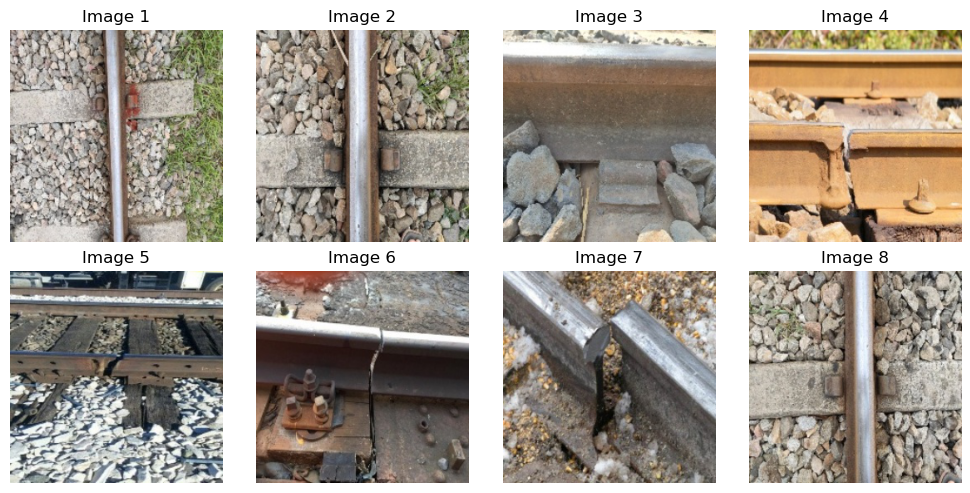

In [10]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.title("Defective Railway Tracks")

# Iterate over the image paths and corresponding subplot axes

for i, (defective_image_arr, ax) in enumerate(zip(defective_image_arr, axes.flatten())):
    # Load the image using any library of your choice (e.g., PIL, OpenCV)
    image = plt.imread(defective_image_arr)

    # Display the image
    ax.imshow(image)
    ax.set_title(f"Image {i+1}")  # Set a title for each subplot
    ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


## Plotting the non defective images

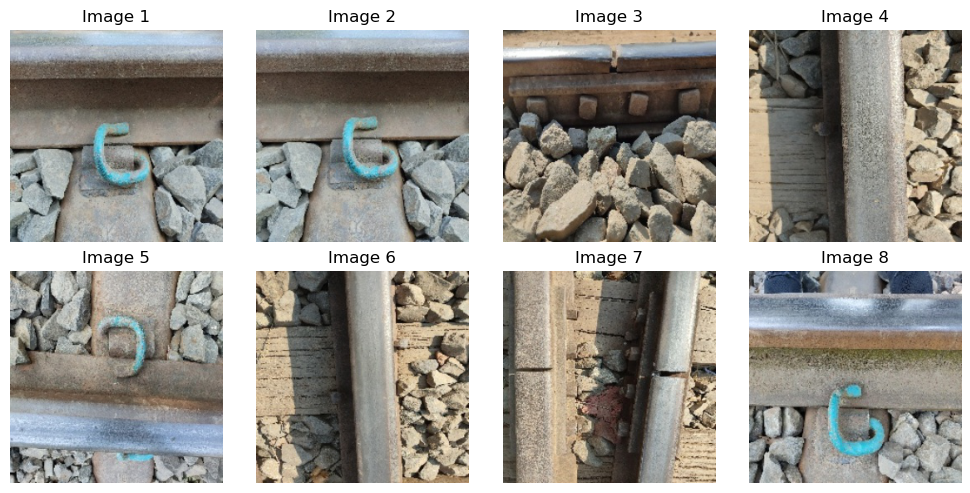

In [11]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.title("Non Defective Railway Tracks")

# Iterate over the image paths and corresponding subplot axes
for i, (non_defective_image_arr, ax) in enumerate(zip(non_defective_image_arr, axes.flatten())):
    # Load the image using any library of your choice (e.g., PIL, OpenCV)
    image = plt.imread(non_defective_image_arr)

    # Display the image
    ax.imshow(image)
    ax.set_title(f"Image {i+1}")  # Set a title for each subplot
    ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [12]:
from skimage.morphology import skeletonize
import cv2

## Declaring some image visual methods using skimage

In [13]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    return Picking_Img

def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skeletonize(Array_Img)
    
    return Skeleton_Img


In [14]:
global defective_track, non_defective_track
defective_track = "Defective Railway Track"
non_defective_track = "Non Defective Railway Track"

Text(0.5, 1.0, 'Defective Railway Track')

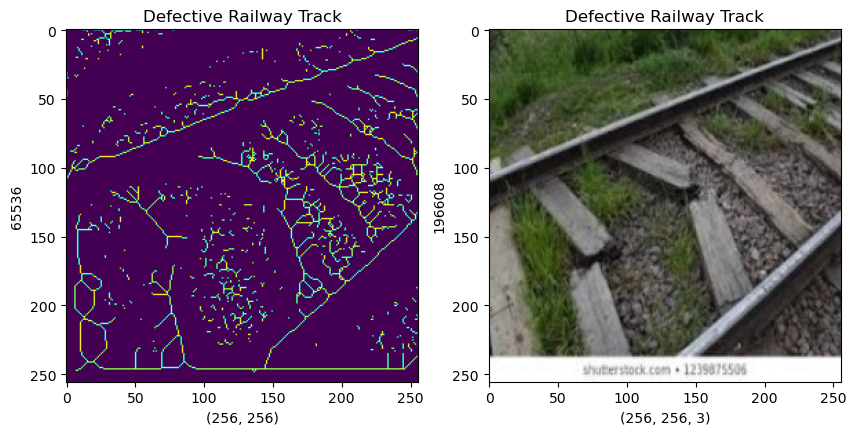

In [15]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

Skel_Img = skeleton_morph_vision(defective_tracks[23])
Simple_Img = simple_vision(defective_tracks[23])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(defective_track)
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(defective_track)

Text(0.5, 1.0, 'Non Defective Railway Track')

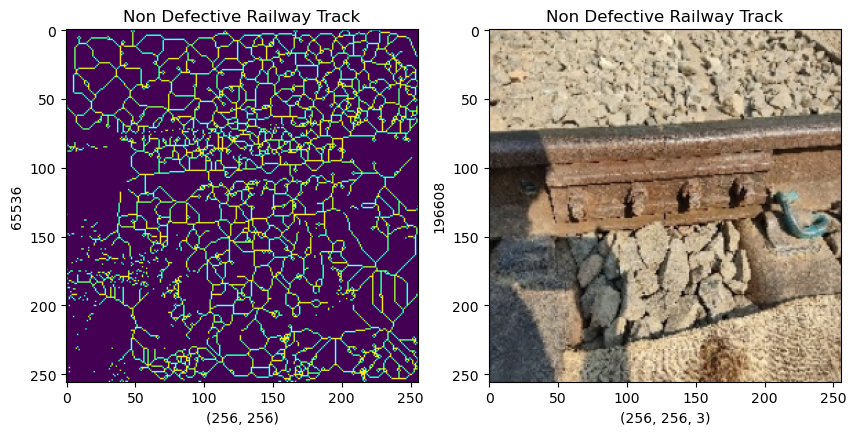

In [16]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

Skel_Img = skeleton_morph_vision(non_defective_tracks[100])
Simple_Img = simple_vision(non_defective_tracks[100])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(non_defective_track)
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(non_defective_track)

## Data Preprocessing

In [17]:
import os

In [18]:
path = "D://ML DL AI DSBDA//Railway Track Fault Detection//Processed Images//"
files = os.listdir(path)
# list of files in path
# sort path from A-Y
files.sort()

In [19]:
print("All the available folders in the directory: \n")
for i in files:
    print(i)

All the available folders in the directory: 

Defective
Non Defective


In [20]:
from tqdm import tqdm

## Converting the image data to numpy array

In [21]:
# create list of image and label
image_array=[]
label_array=[]

# loop through each file in files

for i in tqdm(range(len(files))):
# list of image in each folder
  sub_file=os.listdir(path+"/"+files[i])
# let's check length of each folder
# print(len(sub_file))
# loop through each sub folder
  for j in range(len(sub_file)):
      # path of each image
      #Example:imagepro/A/image_name1.jpg
    file_path = path + "/" + files[i] + "/" + sub_file[j]
      # read each image
    image = cv2.imread(file_path)
      # resize image by 96x96
    image = cv2.resize(image,(96,96))
      # convert BGR image to RGB image
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      # add this image at image_array
    image_array.append(image)
      # add label to label_array
      # i is number from 0 to len(files)-1
      # so we can use it as label
    label_array.append(i)


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.80s/it]


In [22]:
# convert list to array
image_array = np.array(image_array)
label_array = np.array(label_array,dtype="float")
# split the dataset into test and train
from sklearn.model_selection import train_test_split
# output train imagelabel spliting size
X_train, X_test, Y_train, Y_test = train_test_split(image_array, label_array, test_size=0.15)

In [23]:
del image_array,label_array
# to free memory
import gc
gc.collect()

15309

# Model training phase

## Using the EfficientNet50 CNN algorithm to train our Deep Learning model

In [24]:
# Create a model
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential, Model, load_model
model = Sequential()
# add pretrained models to Sequential model
# I will use EfficientNetB0 pretrained model. You can try different model.
pretrained_model = tf.keras.applications.EfficientNetB0(input_shape = (96,96,3), include_top = False)
model.add(pretrained_model)

In [25]:
# add Pooling to model
model.add(layers.GlobalAveragePooling2D())
# add dropout to model
# We add dropout to increase accuracy by reduce overfitting
model.add(layers.Dropout(0.3))
# finally we will addd dense layer as an output
model.add(layers.Dense(1))
# For some tensorflow version we required to build model
model.build(input_shape=(None,96,96,3))
# to see model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 3, 3, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [26]:
model.compile(optimizer = "adam", loss = "mae", metrics=["mae" , "accuracy"])

In [27]:
ckp_path = "trained_model/model"
model_checkpoint 0= tf.keras.callbacks.ModelCheckpoint(
    filepath = ckp_path,
    monitor = "val_mae",
    mode = "auto",
    save_best_only = True,
    save_weights_only = True
)


In [28]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor = 0.9,
    monitor = "val_mae",
    mode = "auto",
    cooldown = 0,
    patience = 5,
    verbose = 1,
    min_lr = 1e-6
)

In [29]:
Epochs=50
Batch_Size=32
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=Batch_Size, epochs=Epochs, callbacks=[model_checkpoint,reduce_lr] )


Epoch 1/50
11/11 [==============================] - 64s 2s/step - loss: 0.7336 - mae: 0.7336 - accuracy: 0.5859 - val_loss: 0.6286 - val_mae: 0.6286 - val_accuracy: 0.5345 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 22s 2s/step - loss: 0.9480 - mae: 0.9480 - accuracy: 0.6288 - val_loss: 0.6200 - val_mae: 0.6200 - val_accuracy: 0.6379 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 20s 2s/step - loss: 0.7938 - mae: 0.7938 - accuracy: 0.6043 - val_loss: 0.5165 - val_mae: 0.5165 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 19s 2s/step - loss: 0.6314 - mae: 0.6314 - accuracy: 0.6350 - val_loss: 0.4406 - val_mae: 0.4406 - val_accuracy: 0.6897 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 19s 2s/step - loss: 0.5522 - mae: 0.5522 - accuracy: 0.7638 - val_loss: 0.4583 - val_mae: 0.4583 - val_accuracy: 0.6724 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 19s 2s/step - loss: 0.4

Epoch 42/50
11/11 [==============================] - 20s 2s/step - loss: 0.1217 - mae: 0.1217 - accuracy: 1.0000 - val_loss: 0.2374 - val_mae: 0.2374 - val_accuracy: 0.8621 - lr: 7.2900e-04
Epoch 43/50
11/11 [==============================] - 20s 2s/step - loss: 0.1034 - mae: 0.1034 - accuracy: 1.0000 - val_loss: 0.2460 - val_mae: 0.2460 - val_accuracy: 0.8793 - lr: 7.2900e-04
Epoch 44/50
11/11 [==============================] - 22s 2s/step - loss: 0.1223 - mae: 0.1223 - accuracy: 1.0000 - val_loss: 0.2229 - val_mae: 0.2229 - val_accuracy: 0.8793 - lr: 7.2900e-04
Epoch 45/50
11/11 [==============================] - 22s 2s/step - loss: 0.1155 - mae: 0.1155 - accuracy: 0.9939 - val_loss: 0.2125 - val_mae: 0.2125 - val_accuracy: 0.8621 - lr: 7.2900e-04
Epoch 46/50
11/11 [==============================] - 20s 2s/step - loss: 0.1133 - mae: 0.1133 - accuracy: 0.9939 - val_loss: 0.2317 - val_mae: 0.2317 - val_accuracy: 0.8448 - lr: 7.2900e-04
Epoch 47/50
11/11 [==============================]

In [30]:
model.load_weights(ckp_path)

In [31]:
prediction_val = model.predict(X_test,batch_size=32)

2/2 [==============================] - 6s 380ms/step


### EfficientNet50 model training and loss statistics

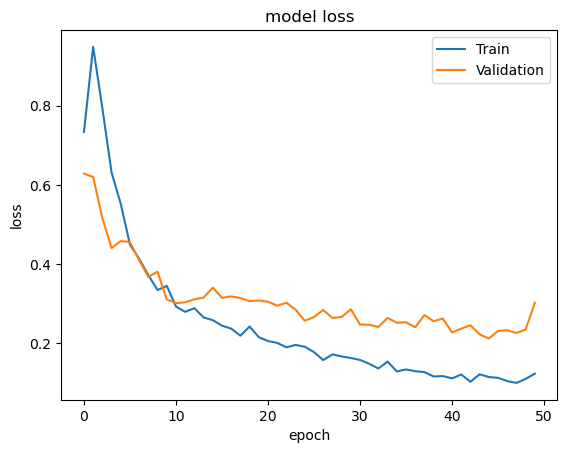

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

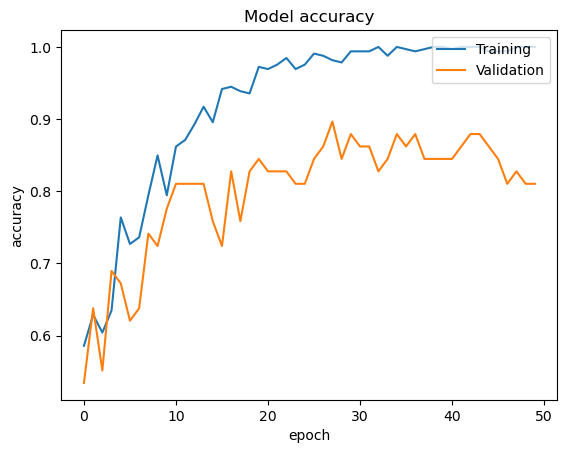

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper right')
plt.show()


In [34]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 159ms/step


In [35]:
# Convert predictions to class labels (assuming binary classification)
class_labels = ['Non-Defective', 'Defective']
predicted_labels = [class_labels[int(pred > 0.5)] for pred in predictions]

In [38]:
# Display the images with predicted labels
num_images = X_test.shape[0]
num_images

58

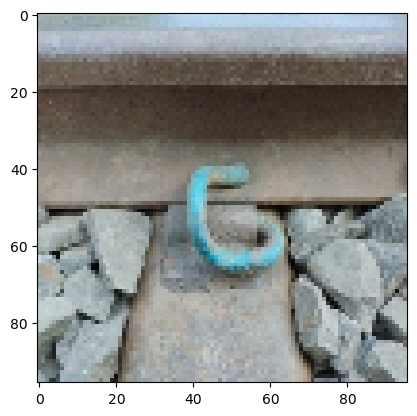

In [43]:
plt.imshow(X_test[0])

### Prediction phase

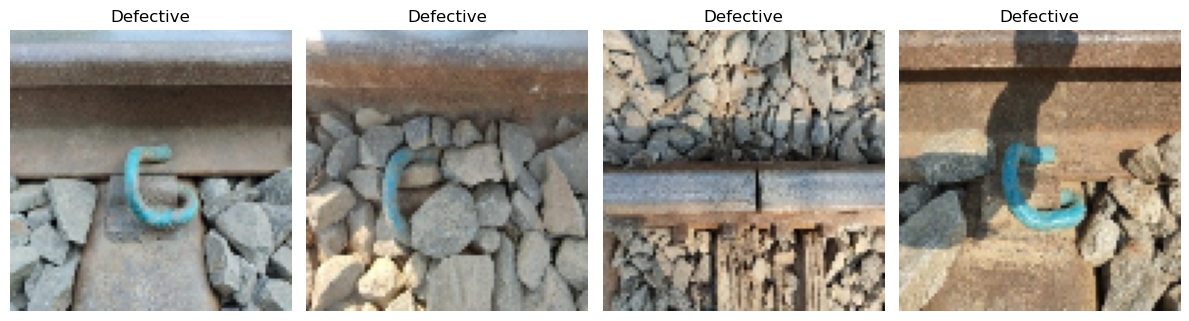

In [45]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

for i in range(4):
    axs[i].imshow(X_test[i])  # Assuming X_test contains image arrays
    axs[i].axis('off')
    axs[i].set_title(predicted_labels[i])

plt.tight_layout()
plt.show()

## Using the InceptionV3 algorithm for model training 

In [52]:
from tensorflow.keras.applications import InceptionV3
# Load the InceptionV3 model with modified input shape
input_shape = (256, 256, 3)

model_2 = Sequential()


inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

model_2.add(pretrained_model)
model_2.add(layers.GlobalAveragePooling2D())
# add dropout to model
# We add dropout to increase accuracy by reduce overfitting
model_2.add(layers.Dropout(0.3))
# finally we will addd dense layer as an output
model_2.add(layers.Dense(1))
# For some tensorflow version we required to build model
model_2.build(input_shape=(None,256,256,3))
# to see model summary
model_2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 3, 3, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [69]:
model_2.compile(optimizer = "adam", loss = "mae", metrics=["mae", "accuracy"])

In [70]:
ckp_path = "trained_model/model"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = ckp_path,
    monitor = "val_mae",
    mode = "auto",
    save_best_only = True,
    save_weights_only = True
)


In [71]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor = 0.9,
    monitor = "val_mae",
    mode = "auto",
    cooldown = 0,
    patience = 5,
    verbose = 1,
    min_lr = 1e-6
)

In [73]:
Epochs=50
Batch_Size=32
history = model_2.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=Batch_Size, epochs=Epochs, callbacks=[model_checkpoint,reduce_lr])

Epoch 1/50
11/11 [==============================] - 37s 2s/step - loss: 0.3076 - mae: 0.3076 - accuracy: 0.8742 - val_loss: 0.8241 - val_mae: 0.8241 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 15s 1s/step - loss: 0.3533 - mae: 0.3533 - accuracy: 0.8037 - val_loss: 0.8037 - val_mae: 0.8037 - val_accuracy: 0.6897 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 17s 2s/step - loss: 0.2725 - mae: 0.2725 - accuracy: 0.8804 - val_loss: 0.6311 - val_mae: 0.6311 - val_accuracy: 0.7759 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 15s 1s/step - loss: 0.2555 - mae: 0.2555 - accuracy: 0.8896 - val_loss: 0.7097 - val_mae: 0.7097 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 15s 1s/step - loss: 0.2294 - mae: 0.2294 - accuracy: 0.9264 - val_loss: 0.6613 - val_mae: 0.6613 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 16s 1s/step - loss: 0.2

11/11 [==============================] - 15s 1s/step - loss: 0.0594 - mae: 0.0594 - accuracy: 0.9969 - val_loss: 0.1861 - val_mae: 0.1861 - val_accuracy: 0.9310 - lr: 7.2900e-04
Epoch 42/50
11/11 [==============================] - 15s 1s/step - loss: 0.0672 - mae: 0.0672 - accuracy: 0.9847 - val_loss: 0.2095 - val_mae: 0.2095 - val_accuracy: 0.9310 - lr: 6.5610e-04
Epoch 43/50
11/11 [==============================] - 16s 1s/step - loss: 0.0551 - mae: 0.0551 - accuracy: 0.9908 - val_loss: 0.2129 - val_mae: 0.2129 - val_accuracy: 0.8621 - lr: 6.5610e-04
Epoch 44/50
11/11 [==============================] - 14s 1s/step - loss: 0.0713 - mae: 0.0713 - accuracy: 0.9816 - val_loss: 0.1842 - val_mae: 0.1842 - val_accuracy: 0.8621 - lr: 6.5610e-04
Epoch 45/50
11/11 [==============================] - 15s 1s/step - loss: 0.0570 - mae: 0.0570 - accuracy: 0.9939 - val_loss: 0.1971 - val_mae: 0.1971 - val_accuracy: 0.8448 - lr: 6.5610e-04
Epoch 46/50
11/11 [==============================] - ETA: 0s -

In [74]:
model_2.load_weights(ckp_path)

In [75]:
prediction_val = model_2.predict(X_test,batch_size=32)

2/2 [==============================] - 2s 204ms/step


## Second model training statistics

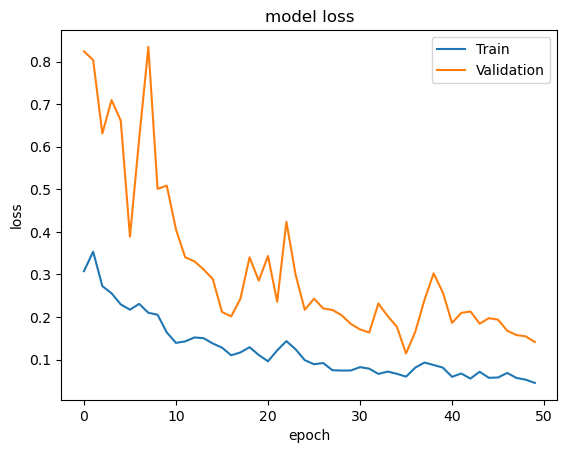

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

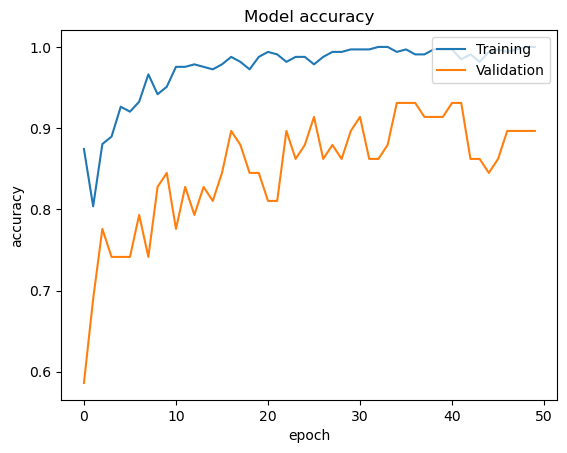

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper right')
plt.show()


In [78]:
# Convert predictions to class labels (assuming binary classification)
class_labels = ['Non-Defective', 'Defective']
predicted_labels = [class_labels[int(pred > 0.5)] for pred in predictions]

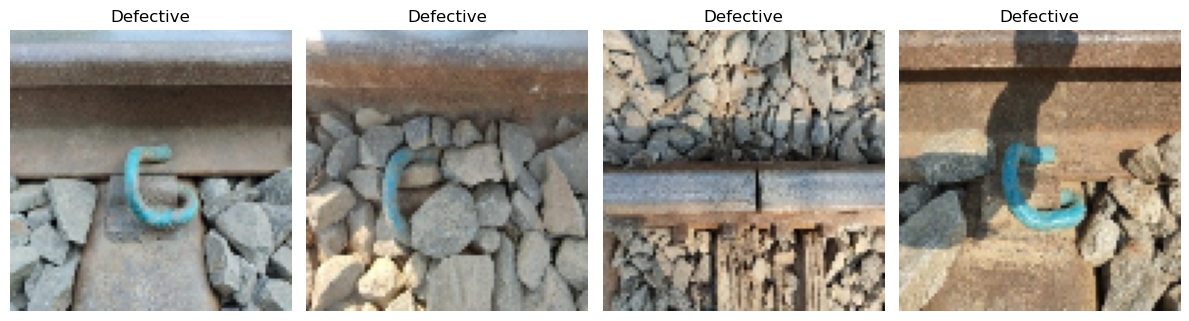

In [79]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

for i in range(4):
    axs[i].imshow(X_test[i])  # Assuming X_test contains image arrays
    axs[i].axis('off')
    axs[i].set_title(predicted_labels[i])

plt.tight_layout()
plt.show()